In [85]:
import frgtools.misc as frgm
import frgtools.xrd as xrd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
# style.use('ggplot') or plt.style.use('ggplot')

import pandas as pd
from scipy.signal import savgol_filter
from scipy.signal import find_peaks_cwt
from tqdm import tqdm

In [86]:
# from importlib import reload
# reload(xrd)

# Loading Raw Data File

In [87]:
fids = frgm.listdir('/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/XRD_CMRR/20210620_T19/ras')

In [88]:
def normalizeCounts(x):
    return (x-x.min()) / (x.max() - x.min())

In [89]:
dfData = {}

for idx, f in enumerate(fids):
    tempdata = xrd.load_smartlab(f)
    del(tempdata['header']) #assumes we dont need the header for following analyses
                            # some tool parameters in here are important to keep track of ie step size, and res
                            # will make repeating sucessful scans easy
    
    if idx == 0: #on first pass, initialize keys for each data entry in the dataframe dictionary
        for k, v in tempdata.items():
            dfData[k] = [v]
    else:  #on subsequent passes, append new lines of data to dataframe dictionary
        for k, v in tempdata.items():
            dfData[k].append(v)      

df = pd.DataFrame(dfData)

In [91]:
fids

['/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/XRD_CMRR/20210620_T19/ras/CsPbX3_Cl10.ras']

In [90]:
np.sin(180)

-0.8011526357338306

In [14]:
# name_key = {
#     'A': 'FAxCsPbI80Br10Cl10',
#     'B': 'FAxCsPbI80Br15Cl5',
#     'C': 'FAxCsPbI80Br19Cl1',
#     'D': 'FAxCsPbI80Br20Cl0',
#     'slow': '30 min step',
#     'fast': '5 min cont.'
# }

def getname(n):
    letter = n.split('_')[0]
    return name_key[letter]

def getname_2(n):
    letter_2 = n.split('_')[1]
    return name_key[letter_2]

def theta_to_d(x):
    return (1.54/(2*np.sin(0.5 * x * np.pi / 180)))

for n in range(df.shape[0]):
    df['angles'][n] = np.array(df['angles'][n])

df['dspacing'] = np.array

# for n in range(df.shape[0]):
#     df['dspacing'][n] = theta_to_d(df['angles'][n]
    
# df['label'] = df['name'].apply(getname)
# df['condition'] = df['name'].apply(getname_2)
df['dspacing'] = df['angles'].apply(theta_to_d)

/Users/deniz/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
df #.head() only displays the 5 first rows of your dataframe, its a safe way of peeking at the data without rendering a potentially massive table

,name,counts,scanaxis,angles,numscans,scanmode,scanspeed,date,time,dspacing
0,CsPbX3_Cl10,"[106.0, 96.0, 110.0, 109.0, 81.0, 95.0, 103.0,...",2-Theta,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...",1,CONTINUOUS,10.0,06/20/21,15:55:27,"[8.83475919916579, 8.825955692972416, 8.817169..."


In [16]:
# Filtering out bugged curves (manual entry)
# df = df[df.name != 'CsPbSnF3_25_5isl']

# plotting a subset of experiment

Filter_1 = ''
Filter_2 = ''
Filter_3 = ''

df_filter1 = df[df.name.str.contains(Filter_1)]
df_filter2 = df_filter1[df_filter1.name.str.contains(Filter_2)]
df_filter3 = df_filter2[df_filter2.name.str.contains(Filter_3)]
df_filter3.reset_index(drop=True, inplace=True)

# list scans in your filtered dataset before plotting
for n in df_filter3['name'].unique(): print(n)

CsPbX3_Cl10


## Looking at selected plots preprocessed, can plot normalized or raw

In [17]:
df_filter3['counts_norm'] = np.array
for n in range(df.shape[0]):
    df_filter3['counts_norm'][n] = normalizeCounts(df_filter3['counts'][n]) 

/Users/deniz/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
from apstools import s2, xrf
import frgtools.plotting as frgplt
import frgtools.misc as frgm
import mendeleev as men
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
from tqdm import tqdm
import warnings
import seaborn as sns
import h5py as h5
import hdf5plugin
import json
import apstools.s26 as s26
import cmocean



import matplotlib.colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
df_filter3

,name,counts,scanaxis,angles,numscans,scanmode,scanspeed,date,time,dspacing,counts_norm
0,CsPbX3_Cl10,"[106.0, 96.0, 110.0, 109.0, 81.0, 95.0, 103.0,...",2-Theta,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...",1,CONTINUOUS,10.0,06/20/21,15:55:27,"[8.83475919916579, 8.825955692972416, 8.817169...","[0.5955056179775281, 0.5393258426966292, 0.617..."


/Users/deniz/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


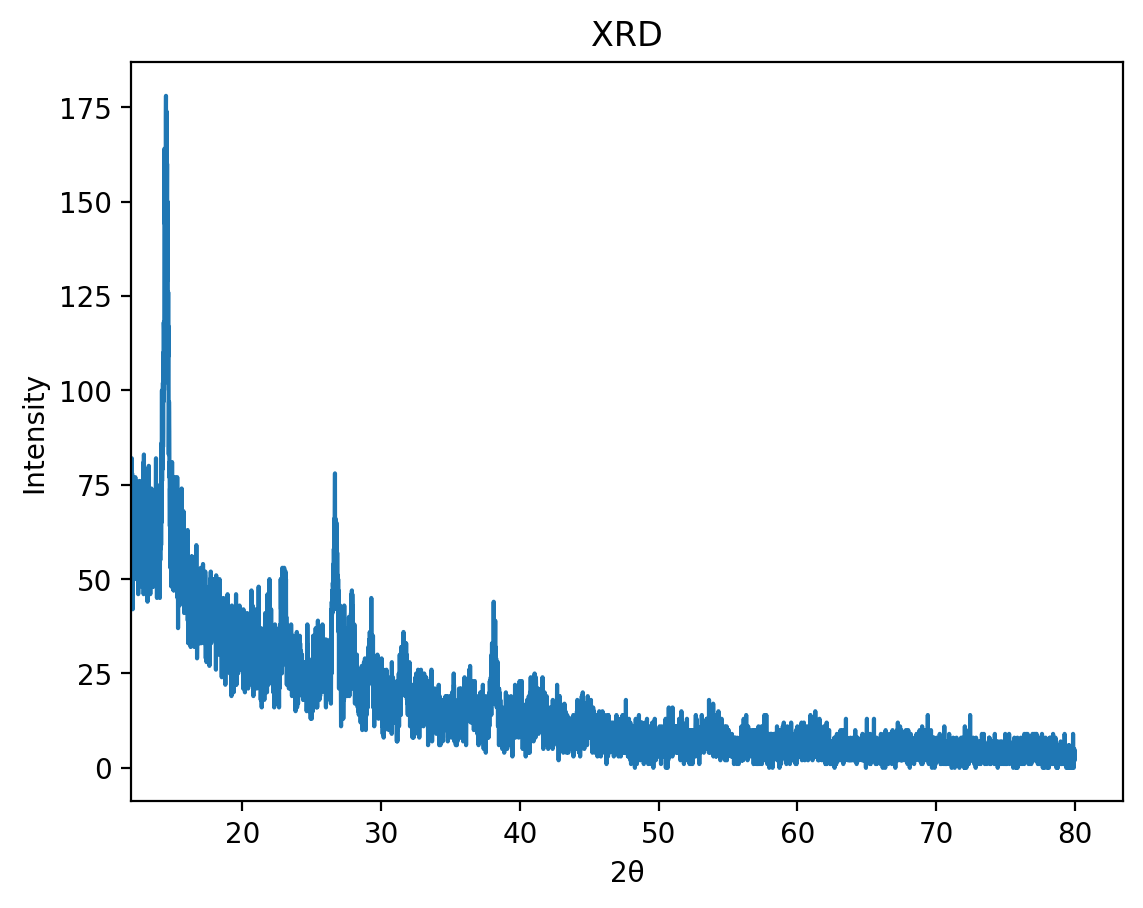

In [20]:
# filtered DataFrame to Plot
DF = df_filter3
beam_energy = 8.05
# single
# q = 3
# plt.plot(DF.loc[q]['angles'],DF.loc[q]['counts'], label=DF['name'][q])

# multiple:
fig = plt.figure()
ax = fig.add_subplot()

for q, (_, r) in enumerate(DF.iterrows()):
    #mask out low intensity peaks
#     a = r['peak_intensity']
#     a = np.ma.masked_where(a <= min_intensity, a)
    
    
    
    for i, t in enumerate(DF['angles']):
        DF['angles'][i] = s26.twotheta_adjust(t, energy = beam_energy, energy0 = 8.04) #convert two theta values to current operating energy. 
#     for i, t in enumerate(xrdlib[idx]['peaks']):
#         xrdlib[idx]['peaks'][i] = s26.twotheta_adjust(t, energy = beam_energy, energy0 = 8.04)
        
    #plotting
    plt.plot(r['angles'], r['counts'] + q*1.1)#, label = r['label'])#, label='CsPbI.8Br.1Cl.1' )#label = r['name'])
#     plt.plot(r['peak_angle'], a + 0.07 + q*1.1, '+')


# for q in range (len(DF)):
#     plt.plot(DF.loc[q]['angles'],DF.loc[q]['counts_norm'], label=DF['name'][q])

# plt.legend()
plt.title('XRD')
# plt.ylim(0,25)
plt.xlim(12)
# plt.yscale("log")


# handles, labels = ax.get_legend_handles_labels()
# ax.legend(reversed(handles), reversed(labels), loc='upper right', bbox_to_anchor=(1.6, 1), shadow=True, ncol=1)

plt.ylabel('Intensity')
plt.xlabel('2θ')
plt.show()

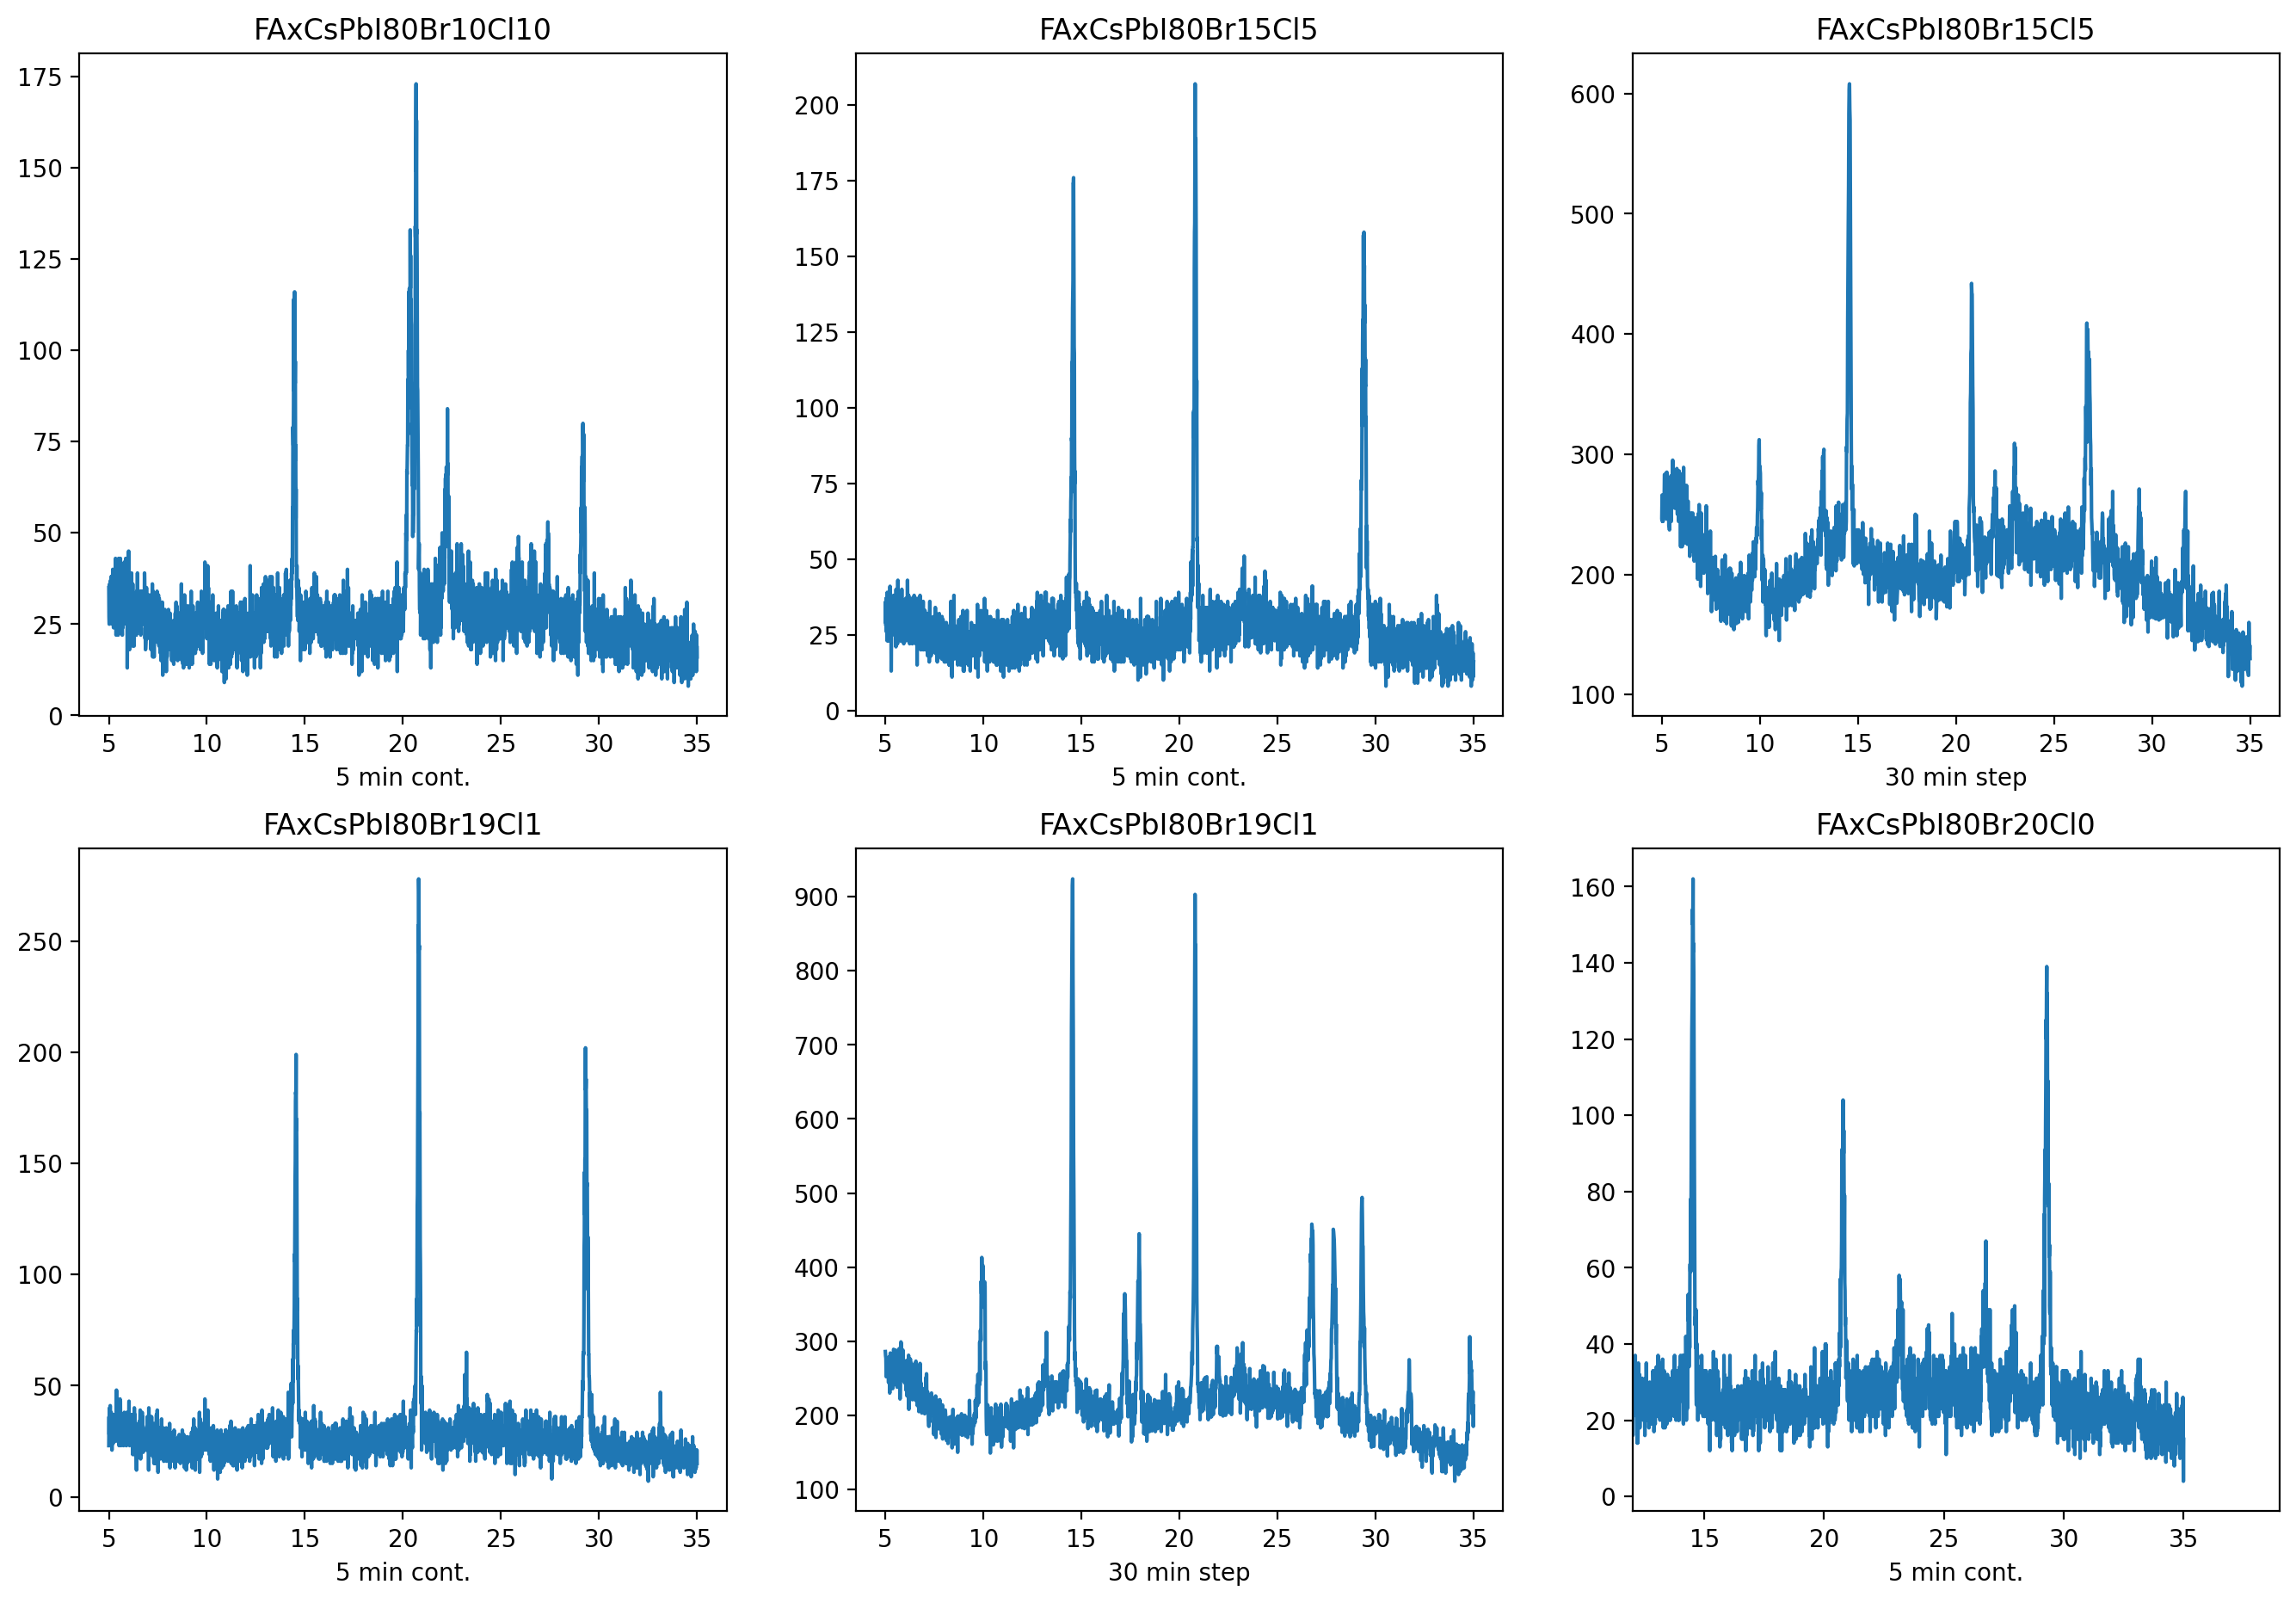

In [44]:
embiggen = 5.5
horiz = 3
vert = 2
cm1 = 'inferno'
cm2 = 'Greys'
fig, ax = plt.subplots(vert, horiz, figsize = (horiz*embiggen, vert*embiggen))

# for n, ax_ in zip(range(0, len(list_of_files)), ax.ravel()):
for n, ax_ in zip(range(0, DF.shape[0]), ax.ravel()):

    ax_.plot(DF['angles'][n], DF['counts'][n], label=DF['label'][n])
    #     im = ax_.imshow(scan_obj.DisplayArray[:,:,1], cmap=cm1, alpha=.5)
#     a=scan_obj.DisplayArray[:,:,1]
#     a.shape
    ax_.set_xlabel(df['condition'][n])
    ax_.set_title(df['label'][n])
#     ax_.set_yticklabels([])
#     ax_.set_xticklabels([5000, 4000, 3000, 2000, 450])
#     ax_.invert_xaxis()
#     divider = make_axes_locatable(ax_)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     cbar = plt.colorbar(im, cax=cax)
#     cbar.mappable.set_clim()

# plt.savefig('SiSpiro_PSK_Device_20210204
# plt.ylim(0,100)
plt.xlim(12,39)

# plt.gca().invert_yaxis()

plt.show()

## Remove Background

In [21]:
df['counts_bgremoved'] = tqdm(df.apply(lambda x: xrd.remove_background(x.angles,x.counts), axis=1))

100%|██████████| 1/1 [00:00<00:00, 9098.27it/s]


## Normalizng All XRD Data

In [22]:
df['counts_bgremoved'] = df['counts_bgremoved'].to_numpy()

In [23]:
from sklearn import preprocessing

In [22]:
# sklearn.preprocessing.normalize(df['counts'], norm='l2', axis=1, copy=True, return_norm=False)

In [44]:
np.max(df['counts_bgremoved'][0])

121.37464387464412

In [45]:
def normalizeCounts(x):
    return (x-np.min(x)) / (np.max(x) - np.min(x))

df['counts_norm'] = np.array
for n in range(df.shape[0]):
    df['counts_norm'][n] = normalizeCounts(df['counts_bgremoved'][n]) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

/Users/deniz/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df

,name,counts,scanaxis,angles,numscans,scanmode,scanspeed,date,time,dspacing,counts_bgremoved,counts_norm
0,CsPbX3_Cl10,"[106.0, 96.0, 110.0, 109.0, 81.0, 95.0, 103.0,...",2-Theta,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...",1,CONTINUOUS,10.0,06/20/21,15:55:27,"[8.83475919916579, 8.825955692972416, 8.817169...","(34.503075628075635, 24.540379990380004, 38.57...","[0.2842692223567754, 0.20218704011791241, 0.31..."


In [24]:
# def normalizeCounts(x):
#     return (x-x.min()) / (x.max() - x.min())
# df['counts_norm'] = df['counts_bgremoved'].apply(normalizeCounts) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

## Noise Filtering

REK Note: just need to be careful about smoothing with XRD data. Most (all?) smoothing filters will introduce some level of peak broadening depending on the window length chosen, and peak heights will likely be decreased as well. Potentially risky to include in default preprocessing for refinement, where peak width/heights are crucial. the refinement itself should essentially be peak fitting and compensate for some noise on its own.

In [32]:
df

,name,counts,scanaxis,angles,numscans,scanmode,scanspeed,date,time,dspacing,counts_bgremoved,counts_norm
0,CsPbX3_Cl10,"[106.0, 96.0, 110.0, 109.0, 81.0, 95.0, 103.0,...",2-Theta,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...",1,CONTINUOUS,10.0,06/20/21,15:55:27,"[8.83475919916579, 8.825955692972416, 8.817169...","(34.503075628075635, 24.540379990380004, 38.57...",<built-in function array>


In [47]:
from functools import partial #https://docs.python.org/2/library/functools.html

#savgol_filter to smooth the data

# df['counts_f1'] = df['counts_norm'].apply(
df['counts_f1'] = df['counts_norm'].apply(
    partial(savgol_filter, window_length = 15, polyorder = 3)
)

In [48]:
df['counts_f2'] = df['counts_f1'].apply(normalizeCounts) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

## Peak Indexing, takes a few seconds

In [49]:
# df['peak_index'] = tqdm(df['counts_f2'].apply(
df['peak_index'] = tqdm(df['counts_f2'].apply(
    partial(find_peaks_cwt, widths = np.arange(10,15), noise_perc = 0.02)
))

100%|██████████| 1/1 [00:00<00:00, 11366.68it/s]


In [50]:
def peakAngles(row):
    angles = [row['angles'][idx] for idx in row['peak_index']]
    return np.asarray(angles)

df['peak_angle'] = df.apply(peakAngles, axis = 1)

## Peak Intensity

In [51]:
def peakIntensity(row):
#     peakI = [row['counts_f2'][idx] for idx in row['peak_index']]
    peakI = [row['counts_f2'][idx] for idx in row['peak_index']]
    return np.asarray(peakI)

df['peak_intensity'] = df.apply(peakIntensity, axis = 1)

### Now Refiltering to Interested Samples

In [52]:
Filter_1 = ''
Filter_2 = ''
Filter_3 = ''

df_filter1 = df[df.name.str.contains(Filter_1)]
df_filter2 = df_filter1[df_filter1.name.str.contains(Filter_2)]
df_filter3 = df_filter2[df_filter2.name.str.contains(Filter_3)]
df_filter3.reset_index(drop=True, inplace=True)
for n in df_filter3['name'].unique(): print(n)

CsPbX3_Cl10


### Now Plotting Processed Data

In [41]:
theta_to_d(35)

2.560642333035742

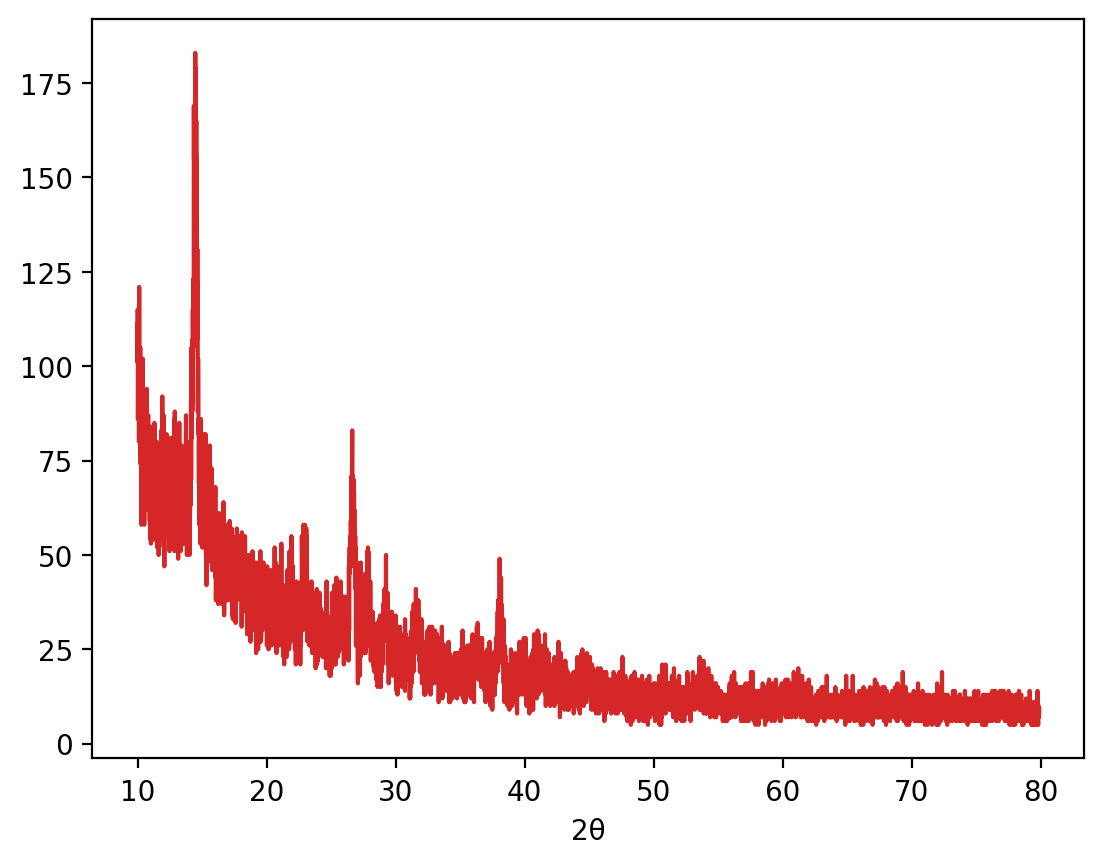

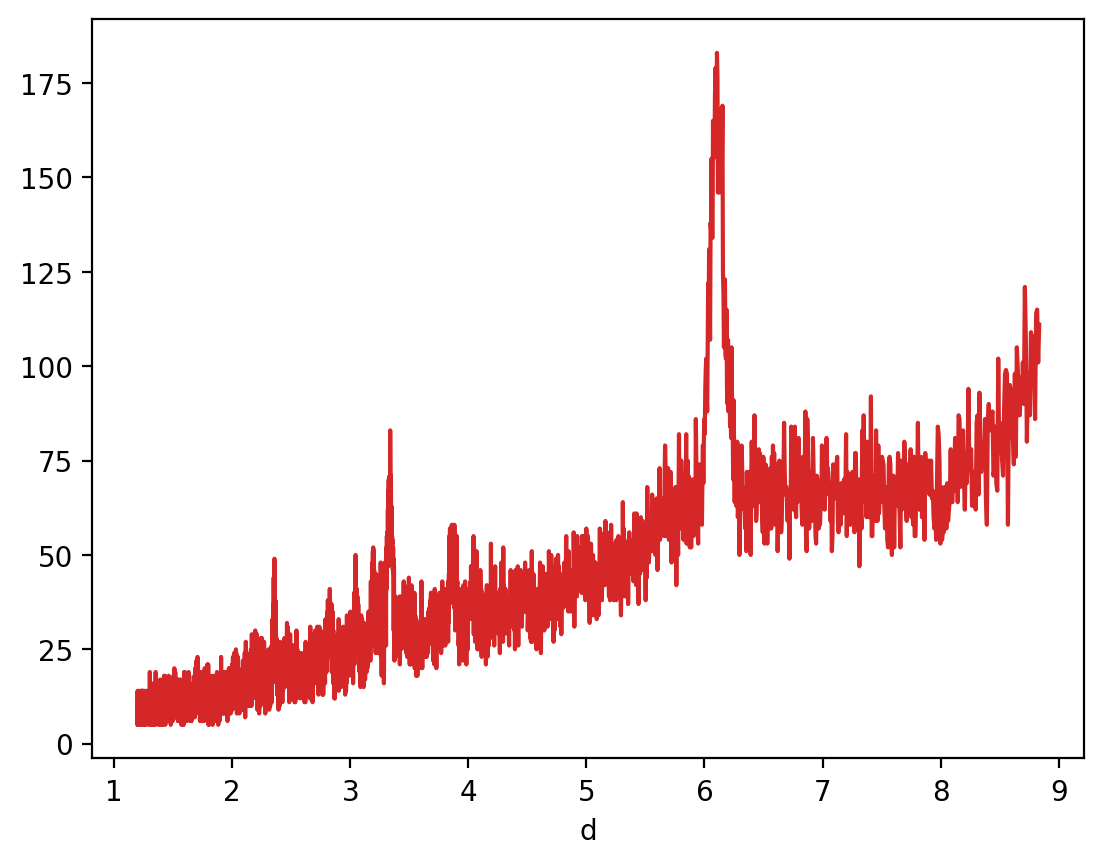

In [54]:
plt.plot(r['angles'], r['counts'] - q*1.1+5, label = r['name'], color= color_choice[q]) # d spacing
plt.xlabel('2θ')

plt.show()

plt.plot(r['dspacing'], r['counts'] - q*1.1+5, label = r['name'], color= color_choice[q]) # d spacing
plt.xlabel('d')
plt.show()


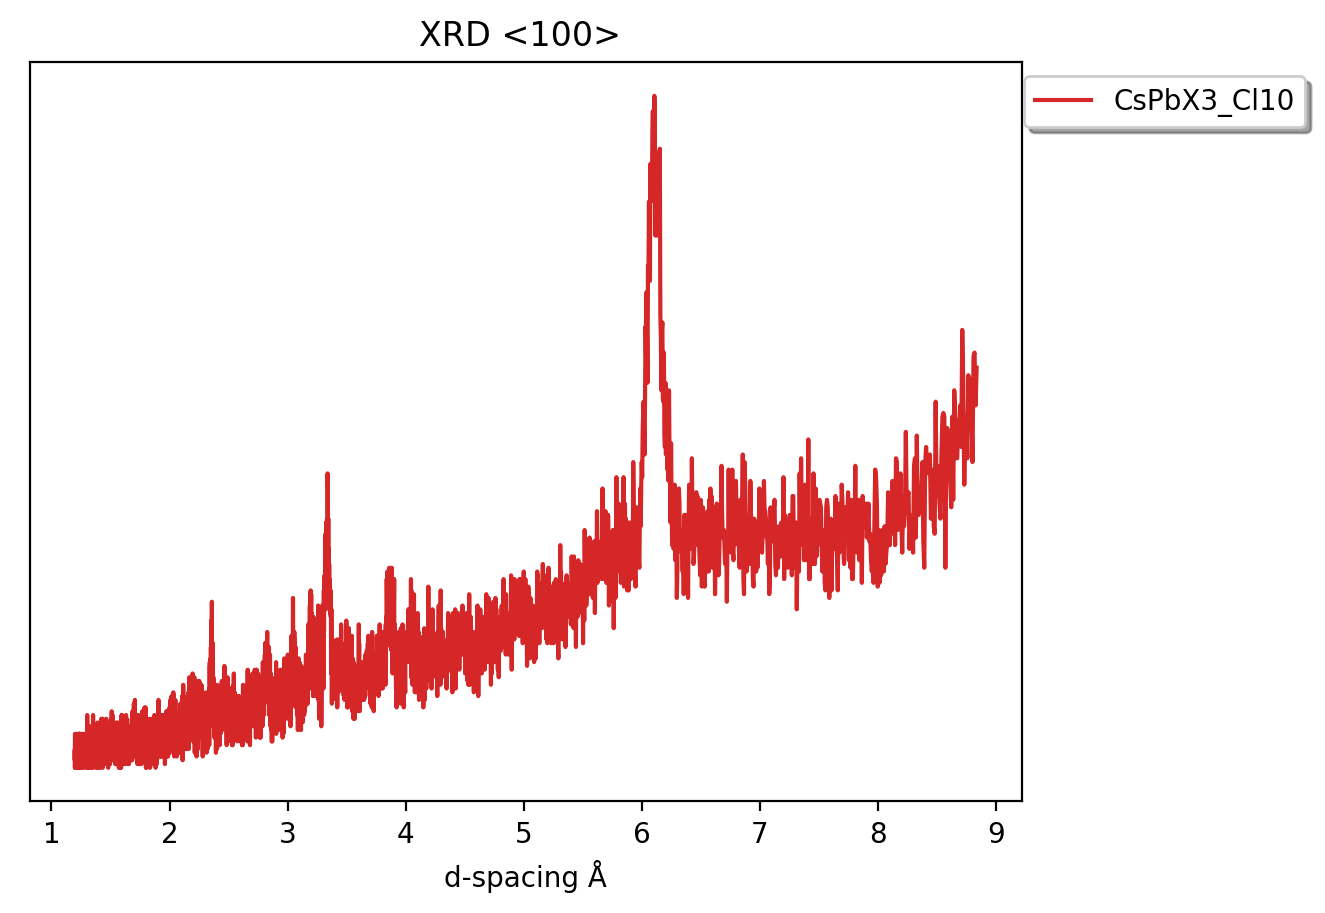

In [56]:
# filtered DataFrame to Plot
DF = df_filter3

mpl.rcParams.update(mpl.rcParamsDefault)

# plotting single use:
# q = 3
# #masking out bad peaks
# a = DF['Peak_Intensity'][q]
# a = np.ma.masked_where(a <= 0.005 , a)

#plotting
# plt.plot(DF.loc[q]['angles'],DF.loc[q]['counts_f1'], label=DF['name'][q])
# plt.plot(DF['Peak_Angle'][q],a+.05,'+')

# plotting multiple use:

min_intensity = 0.03

# for q in range(len(DF)):
#     #masking out bad peaks
#     a = DF['peak_intensity'][q]
#     a = np.ma.masked_where(a <= min_intensity , a)
    
#     #plotting
#     plt.plot(DF.loc[q]['angles'],DF.loc[q]['counts_f1']+q*1.1, label=DF['name'][q])
#     plt.plot(DF['peak_angle'][q],a+0.05+q*1.2,'+')

# fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot()

color_choice = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue']


for q, (_, r) in enumerate(DF.iterrows()):
    #mask out low intensity peaks
    a = r['peak_intensity']
    a = np.ma.masked_where(a <= min_intensity, a)
    
    #plotting
#     plt.plot(r['angles'], r['counts_f2'] - q*1.1+5, label = r['name'], color= color_choice[q])
    plt.plot(r['dspacing'], r['counts'] - q*1.1+5, label = r['name'], color= color_choice[q]) # d spacing

#     plt.plot(r['angles'], r['counts_f2'] + q*1.1, label = r['name'])
#     plt.plot(r['peak_angle'], a + 0.07 + q*1.1, '+', color= 'black') # these are the markers

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)    
    
plt.title('XRD <100> ')
# plt.ylim(0,max(DF.loc[q]['counts_f2']+1.5))
# plt.ylim(0,max(DF.loc[q]['counts_f2']+8))
# plt.ylim(-.05, 4.5)

# plt.xlim(min(DF.loc[q]['angles']),max(DF.loc[q]['angles']))
# plt.xlim(6,6.2)
# plt.xlim(14.25,14.8)
ax.set_yticks([])

# plt.ylabel('Intensity a.u.')
# plt.xlabel('2θ')
plt.xlabel('d-spacing Å')

plt.show()

In [84]:
DF['peak_angle'][0]

array([10.09, 14.5 , 20.68, 23.07, 26.69, 29.25, 31.61, 35.68, 36.35,
       38.13, 41.6 , 45.15, 52.69, 60.94, 73.38, 76.54, 79.26, 79.9 ])

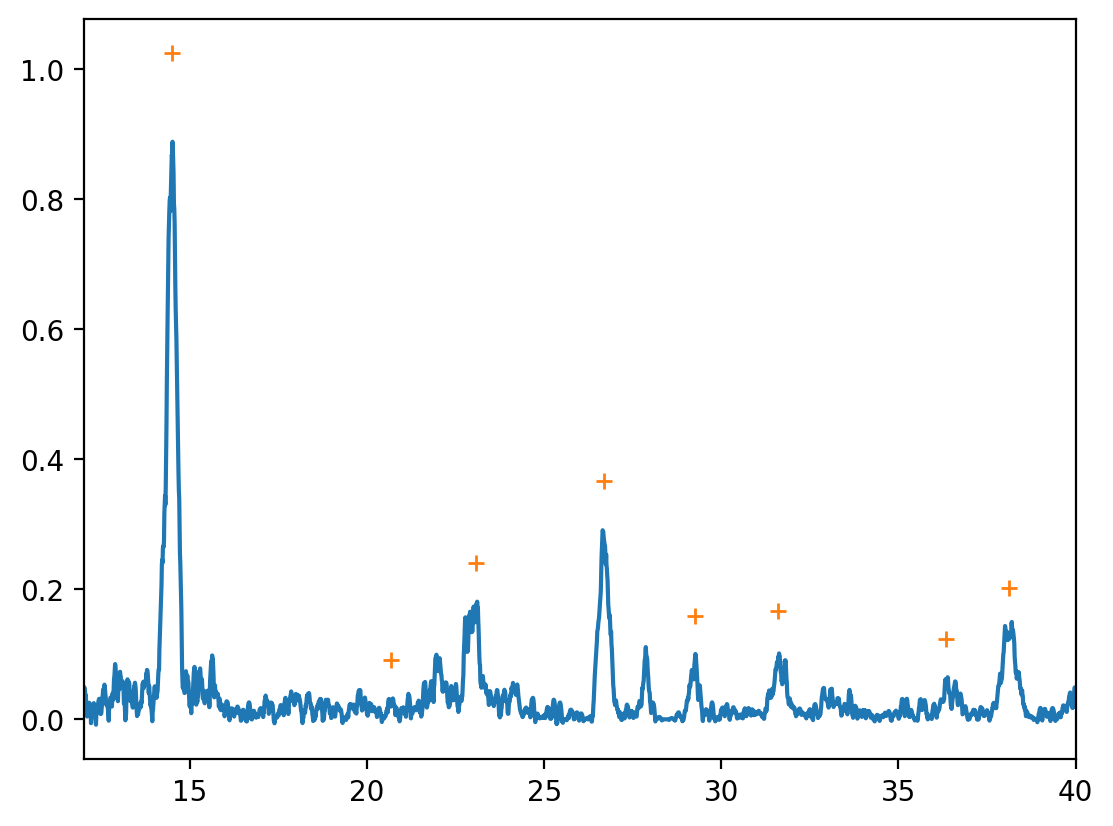

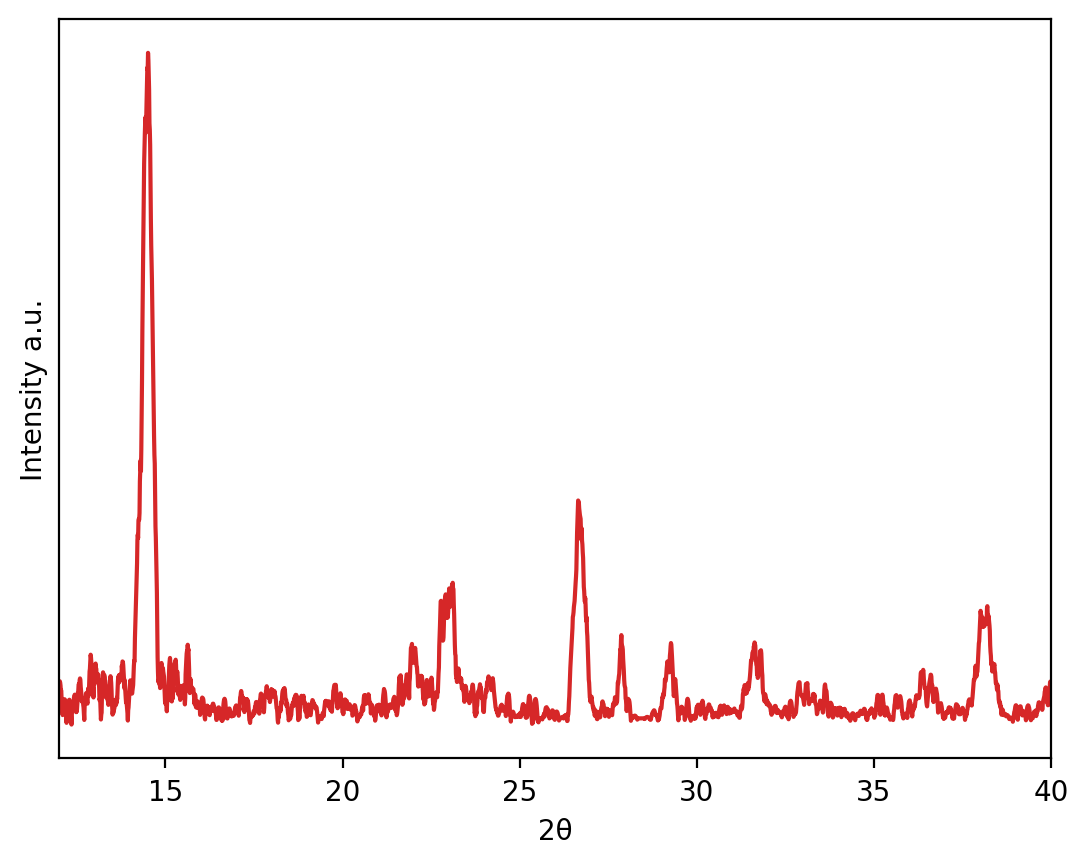

In [82]:
# filtered DataFrame to Plot
DF = df_filter3

mpl.rcParams.update(mpl.rcParamsDefault)

# plotting single use:
# q = 3
# #masking out bad peaks
# a = DF['Peak_Intensity'][q]
# a = np.ma.masked_where(a <= 0.005 , a)

#plotting
# plt.plot(DF.loc[q]['angles'],DF.loc[q]['counts_f1'], label=DF['name'][q])
# plt.plot(DF['Peak_Angle'][q],a+.05,'+')

# plotting multiple use:

min_intensity = 0.040

for q in range(len(DF)):
    #masking out bad peaks
    a = DF['peak_intensity'][q]
    a = np.ma.masked_where(a <= min_intensity , a)
    
    #plotting
    plt.plot(DF.loc[q]['angles'],DF.loc[q]['counts_f1']+q*1.1, label=DF['name'][q])
    plt.plot(DF['peak_angle'][q],a+0.05+q*1.2,'+')
    plt.xlim(12,40)


# fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot()
from itertools import cycle

color_choice = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue']

# plt.rc('axes', prop_cycle=(cycler('color', ['b', 'b', 'b', 'b'])))

for q, (_, r) in enumerate(DF.iterrows()):
    #mask out low intensity peaks
    a = r['peak_intensity']
    a = np.ma.masked_where(a <= min_intensity, a)
#     plt.xlim(12,40)

    #plotting
    plt.plot(r['angles'], r['counts_f2'] - q*1.1+5, label = r['name'], color=color_choice[q])
    
#     plt.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k'])
#     plt.plot(r['dspacing'], r['counts_f2'] + q*1.1, label = r['name']) # d spacing

#     plt.plot(r['angles'], r['counts_f2'] + q*1.1, label = r['name'])
#     plt.plot(r['peak_angle'], a + 0.07 + q*1.1, '+', color= 'black') # these are the markers

handles, labels = ax.get_legend_handles_labels()
# ax.legend(loc='upper right', bbox_to_anchor=(1.21, 1), shadow= True)
# ax.legend(reversed(handles), reversed(labels), loc='upper right', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)    


# plt.title('XRD <100> ')
# plt.ylim(0,max(DF.loc[q]['counts_f2']+1.5))
# plt.ylim(0,max(DF.loc[q]['counts_f2']+8))
# plt.ylim(-.05, 4.5)
# 
# plt.xlim(min(DF.loc[q]['angles']),max(DF.loc[q]['angles']))
# plt.xlim(6,6.2)
plt.xlim(12,40)


ax.set_yticks([])
#     ax_.set_yticks([])
    
plt.ylabel('Intensity a.u.')
plt.xlabel('2θ')
plt.show()

In [137]:
color = ['red', 'green', 'blue', 'blue']

In [138]:
color[1]

'green'

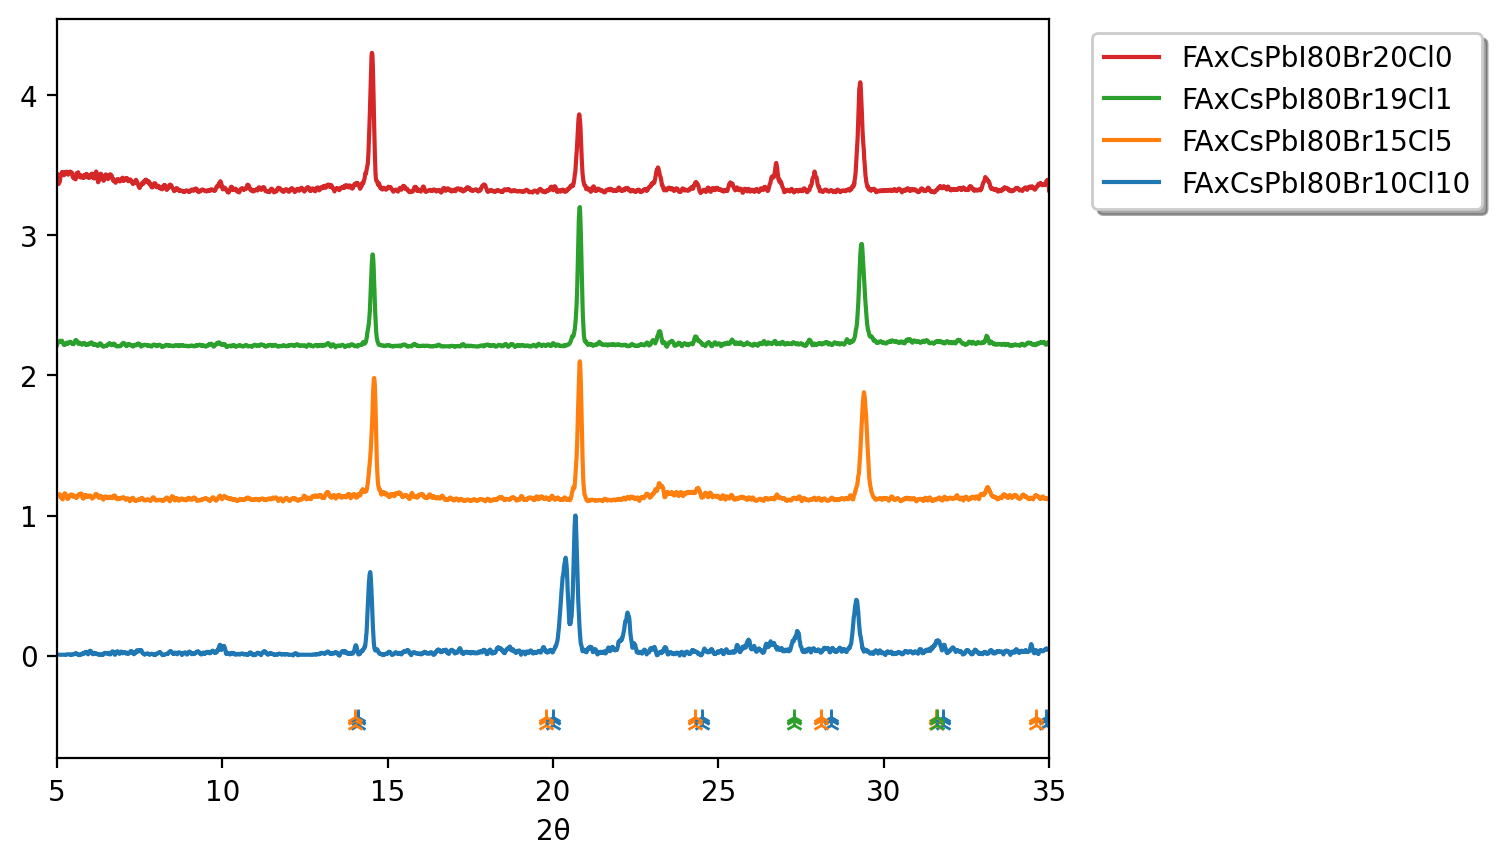

In [76]:
materials = {
    'CsPbI3 [ICSD]': [14.1, 20, 24.5, 28.4, 31.8, 34.9],
    'CsPbBr3': [14, 19.8, 24.3, 28.1, 31.58, 34.6, 40.2],
#     'NaCl': [27.136, 31.435]
    'NaCl': [27.3, 31.6]


}

fig = plt.figure()
ax = fig.add_subplot()

for q, (_, r) in enumerate(DF.iterrows()):
    #mask out low intensity peaks
    a = r['peak_intensity']
    a = np.ma.masked_where(a <= min_intensity, a)
    
    #plotting
    plt.plot(r['angles'], r['counts_f2'] + q*1.1, label = r['label'])#+' '+r['condition'])#, label='CsPbI.8Br.1Cl.1' )#label = r['name'])
#     plt.plot(r['peak_angle'], a + 0.07 + q*1.1, '+')
    
    xlim0 = plt.xlim()
    for midx, (material, peaks) in enumerate(materials.items()):
        for p in peaks:
#             if p > xlim0[0] and p < xlim0[1]:
#                 idx = np.argmin(np.abs(r['angles'] - p))
            plt.plot(p, r['counts_f2'][idx] -.5, '2', color = plt.cm.tab10(midx))# label='CsPbI3 [ICSD]')


handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right', bbox_to_anchor=(1.45, 1), shadow=True, ncol=1)
# plt.yscale("log")

# plt.legend()
plt.xlim(min(DF.loc[q]['angles']),max(DF.loc[q]['angles']))
plt.xlabel('2θ')

plt.show()

## extra stuff

In [134]:
materials = {
    'PbI2': [12.1, 26.2],
    'CsPbBr3': [20, 30, 40]
}

label = None
for q, (_, r) in enumerate(DF.iterrows()):
    #mask out low intensity peaks
    a = r['peak_intensity']
    a = np.ma.masked_where(a <= min_intensity, a)

    #plotting
    plt.plot(r['angles'], r['counts_f2'] + q*1.1, label = r['name'])
#     plt.plot(r['peak_angle'], a + 0.07 + q*1.1, '+')

    xlim0 = plt.xlim()
    
    symbollist = ['+', 'o', 'square']
    for midx, (material, peaks) in enumerate(materials.items()):
        if q == DF.shape[0]-1:
            label = material
        for p in peaks:
            if p > xlim0[0] and p < xlim0[1]:
                idx = np.argmin(np.abs(r['angles'] - p))
                idxmin = np.max([0, idx-20])
                idxmax = np.min([idx+20, len(r['angles'])-1])
                y = np.max(r['counts_f2'][idxmin:idxmax])
#                 y = r['counts_f1'][idx]
                plt.plot(p, y + 0.07 + q*1.1, '+', color = 'k', marker = symbollist[midx], label = label)
                label = None
    plt.legend()
                    


TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [ ]:
x = r['angles']
y = r['counts_f2']

plt.plot(x,y)

In [ ]:
np.argmin(np.abs(x - 26))

In [ ]:
x[1100]

In [ ]:
y[1100]